In [74]:
from climada.hazard import Centroids, TropCyclone

# construct centroids
min_lat, max_lat, min_lon, max_lon = 16.99375, 21.95625, -72.48125, -61.66875
min_lat, max_lat, min_lon, max_lon = 12, 18, 120, 126
cent = Centroids()
cent.set_raster_from_pnt_bounds((min_lon, min_lat, max_lon, max_lat), res=0.05)
cent.check()




2021-03-18 21:47:13,498 - climada.util.coordinates - INFO - Reading C:\Users\ATeklesadik\OneDrive - Rode Kruis\Documents\documents\climada\climada_python-main\data\demo\SC22000_VE__M1.grd.gz
event_id:  [1]
event_name:  ['1']
date:  [1.]
frequency:  [0.5]
orig:  [ True]
min, max fraction:  0.0 1.0


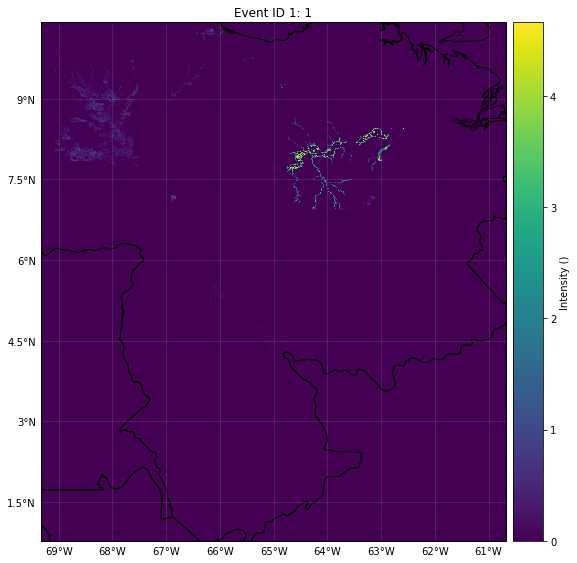

In [146]:
%matplotlib inline
import numpy as np
from climada.hazard import Hazard
from climada.util.constants import HAZ_DEMO_FL

haz_ven = Hazard('FL')
# read intensity from raster file HAZ_DEMO_FL and set frequency for the contained event
haz_ven.set_raster([HAZ_DEMO_FL], attrs={'frequency':np.ones(1)/2})
haz_ven.check()

# The masked values of the raster are set to 0
# Sometimes the raster file does not contain all the information, as in this case the mask value -9999
# We mask it manuall and plot it using plot_intensity()
haz_ven.intensity[haz_ven.intensity==-9999] = 0
haz_ven.plot_intensity(1, smooth=False) # if smooth=True (default value) is used, the computation time might increase

# per default the following attributes have been set
print('event_id: ', haz_ven.event_id)
print('event_name: ', haz_ven.event_name)
print('date: ', haz_ven.date)
print('frequency: ', haz_ven.frequency)
print('orig: ', haz_ven.orig)
print('min, max fraction: ', haz_ven.fraction.min(), haz_ven.fraction.max())

In [147]:
# Solution:

# 1. The CRS can be reprojected using dst_crs option
haz = Hazard('FL')
haz.set_raster([HAZ_DEMO_FL], dst_crs={'init':'epsg:2201'}) 
haz.check()
print('\n Solution 1:')
print('centroids CRS:', haz.centroids.crs)
print('raster info:', haz.centroids.meta)

# 2. Transformations of the coordinates can be set using the transform option and Affine 
from rasterio import Affine
haz = Hazard('FL')
haz.set_raster([HAZ_DEMO_FL], transform=Affine(0.009000000000000341, 0.0, -69.33714959699981, \
                                               0.0, -0.009000000000000341, 10.42822096697894), height=500, width=501) 
haz.check()
print('\n Solution 2:')
print('raster info:', haz.centroids.meta)
print('intensity size:', haz.intensity.shape)

# 3. A partial part of the raster can be loaded using the window or geometry
from rasterio.windows import Window
haz = Hazard('FL')
haz.set_raster([HAZ_DEMO_FL], window=Window(10, 10, 20, 30))
haz.check()
print('\n Solution 3:')
print('raster info:', haz.centroids.meta)
print('intensity size:', haz.intensity.shape)

2021-03-18 21:47:46,553 - climada.util.coordinates - INFO - Reading C:\Users\ATeklesadik\OneDrive - Rode Kruis\Documents\documents\climada\climada_python-main\data\demo\SC22000_VE__M1.grd.gz

 Solution 1:
centroids CRS: {'init': 'epsg:2201'}
raster info: {'driver': 'GSBG', 'dtype': 'float32', 'nodata': 1.701410009187828e+38, 'width': 978, 'height': 1091, 'count': 1, 'crs': {'init': 'epsg:2201'}, 'transform': Affine(1011.5372910988809, 0.0, 1120744.5486664253,
       0.0, -1011.5372910988809, 1189133.7652687666)}
2021-03-18 21:47:49,070 - climada.util.coordinates - INFO - Reading C:\Users\ATeklesadik\OneDrive - Rode Kruis\Documents\documents\climada\climada_python-main\data\demo\SC22000_VE__M1.grd.gz

 Solution 2:
raster info: {'driver': 'GSBG', 'dtype': 'float32', 'nodata': 1.701410009187828e+38, 'width': 501, 'height': 500, 'count': 1, 'crs': CRS.from_epsg(4326), 'transform': Affine(0.009000000000000341, 0.0, -69.33714959699981,
       0.0, -0.009000000000000341, 10.42822096697894)}
i

In [148]:
from climada.hazard import Hazard
from climada.util import HAZ_DEMO_H5 # CLIMADA's Python file
# Hazard needs to know the acronym of the hazard type to be constructed!!! Use 'NA' if not known.
haz_tc_fl = Hazard('TC')
haz_tc_fl.read_hdf5(HAZ_DEMO_H5)  # Historic tropical cyclones in Florida from 1990 to 2004
haz_tc_fl.check() # Use always the check() method to see if the hazard has been loaded correctly

2021-03-18 21:48:22,538 - climada.hazard.base - INFO - Reading C:\Users\ATeklesadik\OneDrive - Rode Kruis\Documents\documents\climada\climada_python-main\data\demo\tc_fl_1990_2004.h5


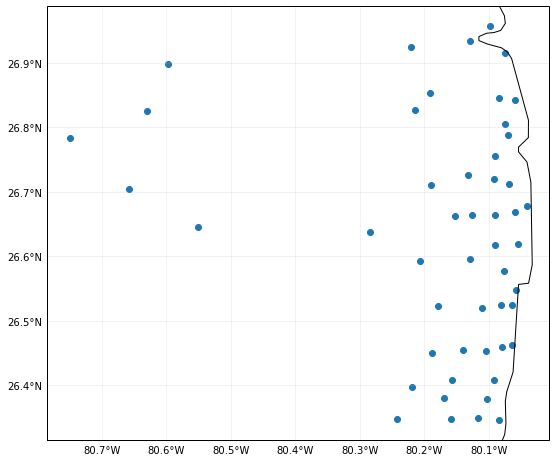

In [149]:
 # setting points 
import numpy as np
from scipy import sparse

lat = np.array([26.933899, 26.957203, 26.783846, 26.645524, 26.897796, 26.925359, \
       26.914768, 26.853491, 26.845099, 26.82651 , 26.842772, 26.825905, \
       26.80465 , 26.788649, 26.704277, 26.71005 , 26.755412, 26.678449, \
       26.725649, 26.720599, 26.71255 , 26.6649  , 26.664699, 26.663149, \
       26.66875 , 26.638517, 26.59309 , 26.617449, 26.620079, 26.596795, \
       26.577049, 26.524585, 26.524158, 26.523737, 26.520284, 26.547349, \
       26.463399, 26.45905 , 26.45558 , 26.453699, 26.449999, 26.397299, \
       26.4084  , 26.40875 , 26.379113, 26.3809  , 26.349068, 26.346349, \
       26.348015, 26.347957])

lon = np.array([-80.128799, -80.098284, -80.748947, -80.550704, -80.596929, \
       -80.220966, -80.07466 , -80.190281, -80.083904, -80.213493, \
       -80.0591  , -80.630096, -80.075301, -80.069885, -80.656841, \
       -80.190085, -80.08955 , -80.041179, -80.1324  , -80.091746, \
       -80.068579, -80.090698, -80.1254  , -80.151401, -80.058749, \
       -80.283371, -80.206901, -80.090649, -80.055001, -80.128711, \
       -80.076435, -80.080105, -80.06398 , -80.178973, -80.110519, \
       -80.057701, -80.064251, -80.07875 , -80.139247, -80.104316, \
       -80.188545, -80.21902 , -80.092391, -80.1575  , -80.102028, \
       -80.16885 , -80.116401, -80.08385 , -80.241305, -80.158855])

n_cen = lon.size # number of centroids
n_ev = 10 # number of events

haz = Hazard('TC')
haz.centroids.set_lat_lon(lat, lon) # default crs used
haz.intensity = sparse.csr_matrix(np.random.random((n_ev, n_cen)))
haz.units = 'm'
haz.event_id = np.arange(n_ev, dtype=int)
haz.event_name = ['ev_12', 'ev_21', 'Maria', 'ev_35', 'Irma', 'ev_16', 'ev_15', 'Edgar', 'ev_1', 'ev_9']
haz.date = [721166, 734447, 734447, 734447, 721167, 721166, 721167, 721200, 721166, 721166]
haz.orig = np.zeros(n_ev, bool)
haz.frequency = np.ones(n_ev)/n_ev
haz.fraction = haz.intensity.copy()
haz.fraction.data.fill(1)
haz.check()
haz.centroids.plot()

Check centroids borders: (-72.0, -3.0, -52.0, 22.0)
Check centroids borders: (-72.25, -3.25, -51.75, 22.25)


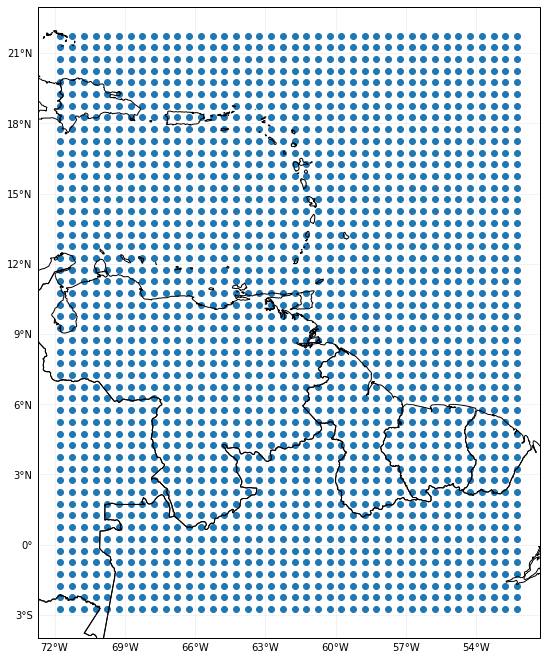

In [150]:
# setting raster 
import numpy as np
from scipy import sparse

# raster info:
# border upper left corner (of the pixel, not of the center of the pixel)
xf_lat = 22
xo_lon = -72
# resolution in lat and lon
d_lat = -0.5 # negative because starting in upper corner
d_lon = 0.5 # same step as d_lat
# number of points
n_lat = 50
n_lon = 40

n_ev = 10 # number of events

haz = Hazard('TC')
haz.centroids.set_raster_from_pix_bounds(xf_lat, xo_lon, d_lat, d_lon, n_lat, n_lon) # default crs used
haz.intensity = sparse.csr_matrix(np.random.random((n_ev, haz.centroids.size)))
haz.units = 'm'
haz.event_id = np.arange(n_ev, dtype=int)
haz.event_name = ['ev_12', 'ev_21', 'Maria', 'ev_35', 'Irma', 'ev_16', 'ev_15', 'Edgar', 'ev_1', 'ev_9']
haz.date = [721166, 734447, 734447, 734447, 721167, 721166, 721167, 721200, 721166, 721166]
haz.orig = np.zeros(n_ev, bool)
haz.frequency = np.ones(n_ev)/n_ev
haz.fraction = haz.intensity.copy()
haz.fraction.data.fill(1)
haz.check()
print('Check centroids borders:', haz.centroids.total_bounds)
haz.centroids.plot()

# using set_raster_from_pnt_bounds, the bounds refer to the bounds of the center of the pixel
left, bottom, right, top = xo_lon, -3.0, -52.0, xf_lat
haz.centroids.set_raster_from_pnt_bounds((left, bottom, right, top), 0.5) # default crs used
print('Check centroids borders:', haz.centroids.total_bounds)

In [151]:
# SOLUTION:

# 1.How many synthetic events are contained?
print('Number of total events:', haz_tc_fl.size)
print('Number of synthetic events:', np.logical_not(haz_tc_fl.orig).astype(int).sum())

# 2. Generate a hazard with historical hurricanes ocurring between 1995 and 2001.
hist_tc = haz_tc_fl.select(date=('1995-01-01', '2001-12-31'), orig=True)
print('Number of historical events between 1995 and 2001:', hist_tc.size)

# 3. How many historical hurricanes occured in 1999? Which was the year with most hurricanes between 1995 and 2001?
ev_per_year = hist_tc.calc_year_set() # events ids per year
print('Number of events in 1999:', ev_per_year[1999].size)
max_year = 1995
max_ev = ev_per_year[1995].size
for year, ev in ev_per_year.items():
    if ev.size > max_ev:
        max_year = year
print('Year with most hurricanes between 1995 and 2001:', max_year)

# 4. What is the number of centroids with distance to coast smaller than 1km?
hist_tc.centroids.set_dist_coast()
num_cen_coast = np.argwhere(hist_tc.centroids.dist_coast < 1000).size
print('Number of centroids close to coast: ', num_cen_coast)

Number of total events: 216
Number of synthetic events: 0
Number of historical events between 1995 and 2001: 109
Number of events in 1999: 16
Year with most hurricanes between 1995 and 2001: 1995
2021-03-18 21:52:10,207 - climada.hazard.centroids.centr - INFO - Convert centroids to GeoSeries of Point shapes.
2021-03-18 21:52:10,725 - climada.util.coordinates - INFO - dist_to_coast: UTM 32617 (1/2)
2021-03-18 21:52:12,790 - climada.util.coordinates - INFO - dist_to_coast: UTM 32618 (2/2)
Number of centroids close to coast:  41


2021-03-17 23:21:24,179 - climada.hazard.tc_tracks - WARNING - No valid wind/pressure values found for 2013241N29169.
2021-03-17 23:21:24,289 - climada.hazard.tc_tracks - INFO - Progress: 10%
2021-03-17 23:21:24,376 - climada.hazard.tc_tracks - INFO - Progress: 21%
2021-03-17 23:21:24,463 - climada.hazard.tc_tracks - INFO - Progress: 32%
2021-03-17 23:21:24,553 - climada.hazard.tc_tracks - INFO - Progress: 43%
2021-03-17 23:21:24,639 - climada.hazard.tc_tracks - INFO - Progress: 54%
2021-03-17 23:21:24,728 - climada.hazard.tc_tracks - INFO - Progress: 64%
2021-03-17 23:21:24,825 - climada.hazard.tc_tracks - INFO - Progress: 75%
2021-03-17 23:21:24,921 - climada.hazard.tc_tracks - INFO - Progress: 86%
2021-03-17 23:21:25,029 - climada.hazard.tc_tracks - INFO - Progress: 97%
Number of tracks: 37


C:\Users\ATeklesadik\OneDrive - Rode Kruis\Documents\documents\climada\climada_python-main\climada\util\plot.py:314: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  fig.tight_layout()
C:\Users\ATeklesadik\OneDrive - Rode Kruis\Documents\documents\climada\climada_python-main\climada\util\plot.py:314: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  fig.tight_layout()
c:\users\ateklesadik\anaconda3\envs\climada_env\lib\site-packages\cartopy\mpl\feature_artist.py:225: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  **dict(style))


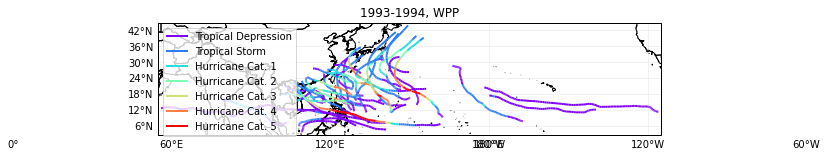

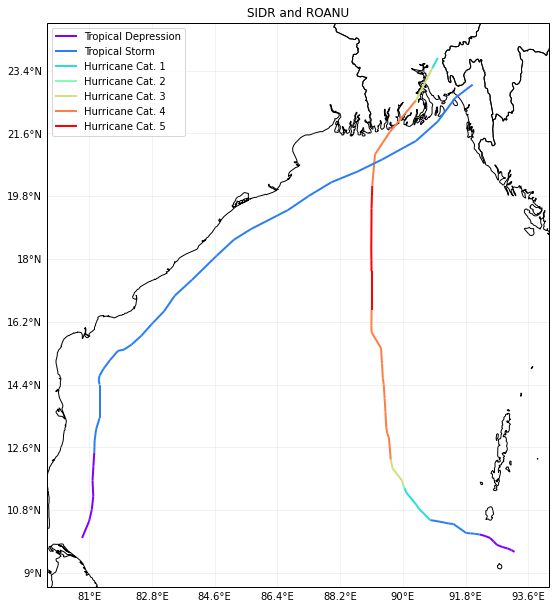

In [8]:
%matplotlib inline
from climada.hazard import TCTracks

tr_irma = TCTracks()
tr_irma.read_ibtracs_netcdf(provider='usa', storm_id='2017242N16333') # IRMA 2017
tr_irma.data[-1]
sel_ibtracs = TCTracks()
# years 1993 and 1994 in basin EP. 
# correct_pres ignores tracks with not enough data. For statistics (frequency of events), these should be considered as well
sel_ibtracs.read_ibtracs_netcdf(provider='usa', year_range=(2013, 2013), basin='WP', correct_pres=False)
print('Number of tracks:', sel_ibtracs.size)
ax = sel_ibtracs.plot()
ax.get_legend()._loc = 2 # correct legend location
ax.set_title('1993-1994, WPP') # set title

track1 = TCTracks()
track1.read_ibtracs_netcdf(provider='usa', storm_id='2007314N10093') # SIDR 2007
track2 = TCTracks()
track2.read_ibtracs_netcdf(provider='usa', storm_id='2016138N10081') # ROANU 2016
track1.append(track2.data) # put both tracks together
ax = track1.plot()
ax.get_legend()._loc = 2 # correct legend location
ax.set_title('SIDR and ROANU'); # set title

2021-03-18 08:22:24,449 - climada.hazard.tc_tracks - WARNING - No valid wind/pressure values found for 1993178N14265, 1993221N12216, 1993223N07185, 1993246N16129, 1993263N11168, 1993271N14134, 1993285N12192, 1993285N16239, 1994128N04155, 1994212N11240, 1994221N15215, 1994224N16240, 1994249N11200, 1994272N40159, 1994273N08176, 1994291N12170, 1994294N13203, 1994295N25188, 1994348N04175.
2021-03-18 08:22:24,567 - climada.hazard.tc_tracks - INFO - Progress: 11%
2021-03-18 08:22:24,664 - climada.hazard.tc_tracks - INFO - Progress: 23%
2021-03-18 08:22:24,752 - climada.hazard.tc_tracks - INFO - Progress: 35%
2021-03-18 08:22:24,840 - climada.hazard.tc_tracks - INFO - Progress: 47%
2021-03-18 08:22:24,928 - climada.hazard.tc_tracks - INFO - Progress: 58%
2021-03-18 08:22:25,026 - climada.hazard.tc_tracks - INFO - Progress: 70%
2021-03-18 08:22:25,145 - climada.hazard.tc_tracks - INFO - Progress: 82%
2021-03-18 08:22:25,242 - climada.hazard.tc_tracks - INFO - Progress: 94%
Number of tracks: 34

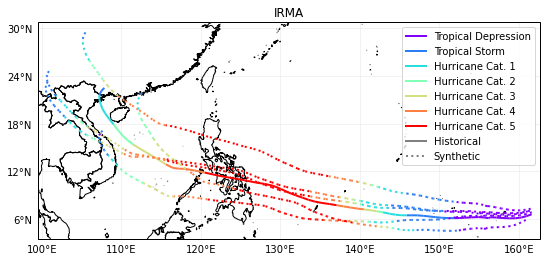

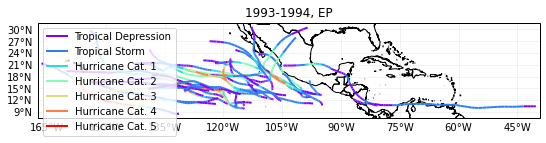

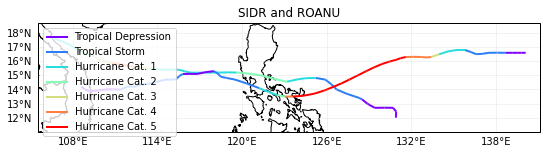

In [11]:

ax = tr_irma.plot()
ax.set_title('IRMA') # set title

# other ibtracs selection options
from climada.hazard import TCTracks
sel_ibtracs = TCTracks()
# years 1993 and 1994 in basin EP. 
# correct_pres ignores tracks with not enough data. For statistics (frequency of events), these should be considered as well
sel_ibtracs.read_ibtracs_netcdf(provider='usa', year_range=(1993, 1994), basin='EP', correct_pres=False)
print('Number of tracks:', sel_ibtracs.size)
ax = sel_ibtracs.plot()
ax.get_legend()._loc = 2 # correct legend location
ax.set_title('1993-1994, EP') # set title

track1 = TCTracks()
track1.read_ibtracs_netcdf(provider='usa', storm_id='2020314N12131') # SIDR 2007
track2 = TCTracks()
track2.read_ibtracs_netcdf(provider='usa', storm_id='2020302N17140') # ROANU 2016
track1.append(track2.data) # put both tracks together
ax = track1.plot()
ax.get_legend()._loc = 2 # correct legend location
ax.set_title('SIDR and ROANU'); # set title

In [ ]:
tr_N = TCTracks()
tr_irma.IBTRACS_FILE 

2021-03-18 08:23:28,767 - climada.hazard.tc_tracks_synth - INFO - Computing 5 synthetic tracks.


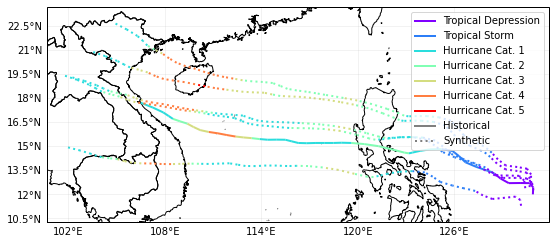

In [12]:
# construct tropical cyclones

tr_irma = TCTracks()
# years 1993 and 1994 in basin EP.
# correct_pres ignores tracks with not enough data. For statistics (frequency of events), these should be considered as well
tr_irma.read_ibtracs_netcdf(provider='usa', year_range=(2020, 2021),storm_id='2020314N12131', basin='WP', correct_pres=False)
#IRMA=sel_ibtracs.get_track('2013306N07162')
tr_irma.calc_random_walk(ens_size=5)
tr_irma.plot()

2020-11-24 18:11:30,936 - climada.hazard.tc_tracks - INFO - Interpolating 6 tracks to 1h time steps.


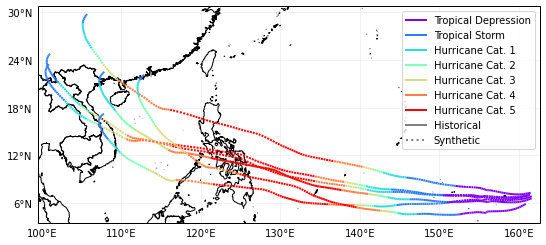

In [56]:
sel_ibtracs.equal_timestep(time_step_h=1) # interpolate properties to 1 hour time step
sel_ibtracs.plot()

2021-03-18 08:42:13,367 - climada.hazard.tc_tracks - INFO - Interpolating 1 tracks to 0.25h time steps.


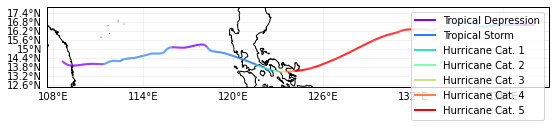

In [24]:
tr_GONI = TCTracks()
# years 1993 and 1994 in basin EP.
# correct_pres ignores tracks with not enough data. For statistics (frequency of events), these should be considered as well
tr_GONI.read_ibtracs_netcdf(provider='usa', storm_id='2020302N17140')
#IRMA=sel_ibtracs.get_track('2013306N07162')
#tr_irma.calc_random_walk(ens_size=5)

tc_GONI = TropCyclone()
tr_GONI.equal_timestep(time_step_h=0.25) # interpolate properties to 1 hour time step
tr_GONI.plot()




In [153]:
#tc_GONI.set_from_tracks(tr_GONI, centroids=cent,store_windfields=True)
#tc_irma.set_from_tracks(tr_irma) # try without given centroids
#tc_GONI.check()
# calculate windfields
tc_hazard = TropCyclone()
tc_hazard.set_from_tracks(tr_GONI, cent, store_windfields=True)

tc_hazard.write_hdf5('haz_tc_goni.h5')



2021-03-18 21:56:09,964 - climada.hazard.trop_cyclone - INFO - Mapping 1 tracks to 14641 centroids.
2021-03-18 21:56:15,491 - climada.hazard.base - INFO - Writing haz_tc_goni.h5


TypeError: Object dtype dtype('O') has no native HDF5 equivalent

In [ ]:
haz = Hazard('TC')
haz.read_hdf5('results/haz_tc_fl.h5')
haz.check()

In [121]:
intensity_dfs = []
ncents = tc_hazard.centroids.size

tracks=tr_GONI.data
windfield=tc_hazard.windfields
intensity=tc_hazard.intensity

In [141]:
print(ncents)
intensity_3d = intensity.toarray().reshape(nsteps, ncents/2, 2)

14641


TypeError: 'float' object cannot be interpreted as an integer

In [145]:
nsteps = intensity.shape[0]
#centroid_id = np.tile(cent.centroid_id, nsteps)
np.shape(intensity)

(1, 14641)

In [ ]:
nsteps = windfield.shape[0]
ncents = centroids.size

    

    intensity_3d = windfield.toarray().reshape(nsteps, ncents, 2)
    intensity = np.linalg.norm(intensity_3d, axis=-1).ravel()

    timesteps = np.repeat(timesteps, ncents)
    timesteps = timesteps.reshape((nsteps, ncents)).ravel()

    inten_tr = pd.DataFrame({
        'centroid_id': centroid_id,
        'value': intensity,
        'timestamp': timesteps,
    })

    inten_tr = inten_tr[inten_tr.value > threshold]

    inten_tr['storm_id'] = index

    return inten_tr

In [ ]:


    

    for (index, track, windfield) in parallel_it:
        intensity_dfs.append(_windfield_to_df(
            windfield, tc_hazard.centroids, track.time.data, index, tc_hazard.intensity_thres
        ))

    intensity_t = pd.concat(intensity_dfs)  # concat list of dfs
    intensity_t['type_id'] = INTENSITY_SERIES_TYPE
    intensity_t.centroid_id = intensity_t.centroid_id.apply(h3.h3_to_string)

In [99]:
import numpy as np
wf_full = np.zeros((npositions, ncentroids, 2))

wf_full[:, reachable_coastal_centr_idx, :] = windfields

new_haz.windfields = [ sparse.csr_matrix(wf_full.reshape(npositions, -1))]

new_haz.units = 'm/s'
new_haz.centroids = centroids

new_haz.event_id = np.array([1])

new_haz.frequency = np.array([1])

new_haz.event_name = [track.sid]
new_haz.fraction = new_haz.intensity.copy()
new_haz.fraction.data.fill(1)
# store first day of track as date
new_haz.date = np.array([
    dt.datetime(track.time.dt.year[0],
                track.time.dt.month[0],
                track.time.dt.day[0]).toordinal()
])
new_haz.orig = np.array([track.orig_event_flag])
new_haz.category = np.array([track.category])
new_haz.basin = [track.basin.shape]

NameError: name 'npositions' is not defined

In [117]:

import pandas as pd


intensity=tc_GONI.intensity
centroids=tc_GONI.centroids
nsteps = intensity.shape
ncents = centroids.size
lon=centroids.lon
lat=centroids.lon
print(intensity[0,14640])

0.0


In [79]:
def _windfield_to_df(windfield, centroids, timesteps, index, threshold):
    """
    Converts a sparse windfield matrix to a DataFrame; wind intensity normalised
    across x and y direction using sqrt(x^2+y^2).
    
    Parameters
    ----------
    windfield: scipy.sparse.csr.csr_matrix
    centroids: Centroids
    timesteps: np.ndarray, dtype=datetime64
    index: int
    threshold: float
        usually the same as in TropCyclone computation
    
    Returns
    -------
    pd.DataFrame
        Columns storm_id, centroid_id, value, timestamp
    """
    nsteps = windfield.shape[0]
    ncents = centroids.size

    centroid_id = np.tile(centroids.centroid_id, nsteps)

    intensity_3d = windfield.toarray().reshape(nsteps, ncents, 2)
    intensity = np.linalg.norm(intensity_3d, axis=-1).ravel()

    timesteps = np.repeat(timesteps, ncents)
    timesteps = timesteps.reshape((nsteps, ncents)).ravel()

    inten_tr = pd.DataFrame({
        'centroid_id': centroid_id,
        'value': intensity,
        'timestamp': timesteps,
    })

    inten_tr = inten_tr[inten_tr.value > threshold]

    inten_tr['storm_id'] = index

    return inten_tr


In [72]:


centroid_id = np.tile(centroids.centroid_id, nsteps)

intensity_3d = windfield.toarray().reshape(nsteps, ncents, 2)
intensity = np.linalg.norm(intensity_3d, axis=-1).ravel()

timesteps = np.repeat(timesteps, ncents)
timesteps = timesteps.reshape((nsteps, ncents)).ravel()

inten_tr = pd.DataFrame({
    'centroid_id': centroid_id,
    'value': intensity,
    'timestamp': timesteps,
})

inten_tr = inten_tr[inten_tr.value > threshold]

inten_tr['storm_id'] = index
    

0      (289, 11130)\t-3.5354948723078556\n  (289, 1...
Name: 0, dtype: object


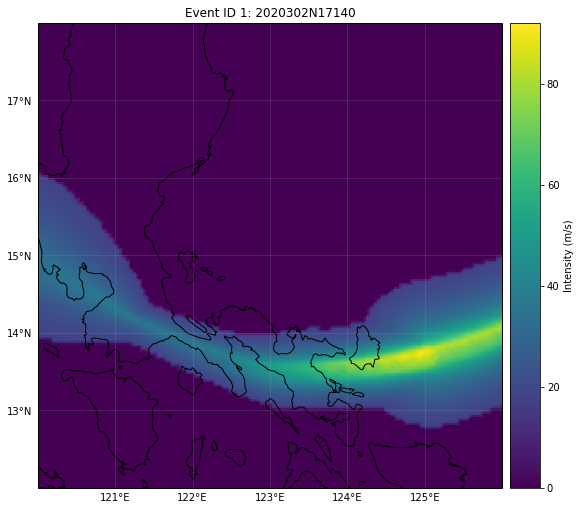

In [26]:



tc_GONI.plot_intensity('2020302N17140')      # IRMA



In [31]:
tc_GONI

TypeError: 'TropCyclone' object is not subscriptable

2021-03-18 08:26:28,537 - climada.hazard.tc_tracks - INFO - Interpolating 1 tracks to 0.25h time steps.
2021-03-18 08:26:29,274 - climada.hazard.centroids.centr - INFO - Convert centroids to GeoSeries of Point shapes.
2021-03-18 08:26:45,707 - climada.util.coordinates - INFO - dist_to_coast: UTM 32650 (1/5)
2021-03-18 08:27:02,058 - climada.util.coordinates - INFO - dist_to_coast: UTM 32651 (2/5)
2021-03-18 08:27:20,465 - climada.util.coordinates - INFO - dist_to_coast: UTM 32652 (3/5)
2021-03-18 08:27:41,380 - climada.util.coordinates - INFO - dist_to_coast: UTM 32653 (4/5)
2021-03-18 08:28:03,572 - climada.util.coordinates - INFO - dist_to_coast: UTM 32654 (5/5)
2021-03-18 08:28:10,968 - climada.hazard.trop_cyclone - INFO - Mapping 1 tracks to 171700 centroids.


KeyboardInterrupt: 

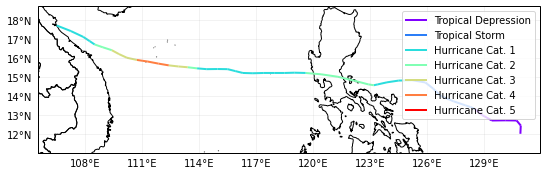

In [13]:
tr_irma = TCTracks()
# years 1993 and 1994 in basin EP.
# correct_pres ignores tracks with not enough data. For statistics (frequency of events), these should be considered as well
tr_irma.read_ibtracs_netcdf(provider='usa', storm_id='2020314N12131')
#IRMA=sel_ibtracs.get_track('2013306N07162')
#tr_irma.calc_random_walk(ens_size=5)
tr_irma.plot()

tc_irma = TropCyclone()

tc_irma.set_from_tracks(tr_irma, centroids=cent)
#tc_irma.set_from_tracks(tr_irma) # try without given centroids
tc_irma.check()
tc_irma.plot_intensity('2020314N12131')      # IRMA
#tc_irma.plot_intensity('2013306N07162_gen1') # IRMA's synthetic track 2

In [74]:
a=2
if not c:
    print('a')
else:
    print('b')

NameError: name 'c' is not defined

2020-11-24 18:22:13,859 - climada.hazard.centroids.centr - INFO - Convert centroids to GeoSeries of Point shapes.
2020-11-24 18:22:34,772 - climada.util.coordinates - INFO - dist_to_coast: UTM 32650 (1/5)
2020-11-24 18:22:57,836 - climada.util.coordinates - INFO - dist_to_coast: UTM 32651 (2/5)
2020-11-24 18:23:20,309 - climada.util.coordinates - INFO - dist_to_coast: UTM 32652 (3/5)
2020-11-24 18:23:46,075 - climada.util.coordinates - INFO - dist_to_coast: UTM 32653 (4/5)
2020-11-24 18:24:14,250 - climada.util.coordinates - INFO - dist_to_coast: UTM 32654 (5/5)
2020-11-24 18:24:23,463 - climada.hazard.trop_cyclone - INFO - Mapping 6 tracks to 171700 centroids.
2020-11-24 18:24:28,813 - climada.hazard.trop_cyclone - INFO - Progress: 16%
2020-11-24 18:24:34,277 - climada.hazard.trop_cyclone - INFO - Progress: 33%
2020-11-24 18:24:39,587 - climada.hazard.trop_cyclone - INFO - Progress: 50%
2020-11-24 18:24:45,211 - climada.hazard.trop_cyclone - INFO - Progress: 66%
2020-11-24 18:24:50,47

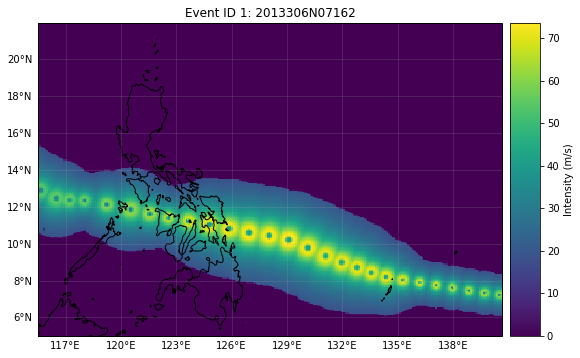

In [66]:
# an Irma event-like in 2055 under RCP 4.5:
tc_irma = TropCyclone()
tc_irma.set_from_tracks(tr_irma, centroids=cent)
tc_irma_cc = tc_irma.set_climate_scenario_knu(ref_year=2055, rcp_scenario=45)
tc_irma_cc.plot_intensity('2013306N07162')

In [ ]:
print('Number of tracks:', sel_ibtracs.size)
tc_irma = TropCyclone()
tc_irma.set_from_tracks(tr_irma, centroids=cent)
#tc_irma.set_from_tracks(tr_irma) # try without given centroids
tc_irma.check()

In [52]:
sel_ibtracs.set_from_tracks(sel_ibtracs, centroids=cent)
sel_ibtracs.plot_intensity('2013306N07162')      # IRMA

AttributeError: 'TCTracks' object has no attribute 'set_from_tracks'

In [ ]:
tr_irma.calc_random_walk(ens_size=5)
tc_irma.plot_intensity('2013306N07162_gen2') # IRMA's synthetic track 2

In [27]:
from climada.hazard import TCTracks

tr_irma = TCTracks()

C:\Users\ATeklesadik\OneDrive - Rode Kruis\Documents\documents\climada\climada_python-main\climada\util\plot.py:314: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  fig.tight_layout()


Text(0.5, 1.0, 'IRMA')

c:\users\ateklesadik\anaconda3\envs\climada_env\lib\site-packages\cartopy\mpl\feature_artist.py:225: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  **dict(style))


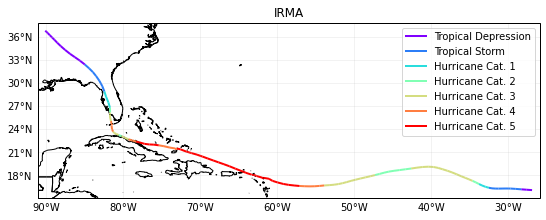

In [7]:
tr_irma.read_ibtracs_netcdf(provider='usa', storm_id='2017242N16333') # IRMA 2017
ax = tr_irma.plot()
ax.set_title('IRMA') # set title

2020-11-24 17:01:56,293 - climada.hazard.tc_tracks - WARNING - No valid wind/pressure values found for 1993059N05136, 1993064N03174, 1993096N08148, 1993105N06165, 1993108N05161, 1993134N04160, 1993164N04160, 1993166N06131, 1993185N09137, 1993193N08144, 1993199N10156, 1993205N15137, 1993207N19130, 1993211N07161, 1993215N08154, 1993221N12216, 1993223N07185, 1993224N07153, 1993229N10159, 1993231N09134, 1993240N17142, 1993246N16129, 1993250N17119, 1993253N06150, 1993261N11131, 1993263N11168, 1993270N07153, 1993271N14134, 1993275N04159, 1993279N12114, 1993285N12192, 1993298N11154, 1993306N10168, 1993316N09177, 1993317N08149, 1993322N09137, 1993331N05172, 1993331N07108, 1993336N05164, 1993353N05159, 1994001N05156, 1994088N09148, 1994128N04155, 1994134N05161, 1994153N19113, 1994169N06152, 1994181N17137, 1994186N09139, 1994189N16117, 1994191N08141, 1994192N05139, 1994197N14115, 1994199N20106, 1994205N13148, 1994206N14131, 1994206N22107, 1994208N20112, 1994210N16144, 1994211N12152, 1994212N1124

C:\Users\ATeklesadik\OneDrive - Rode Kruis\Documents\documents\climada\climada_python-main\climada\util\plot.py:314: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  fig.tight_layout()


Text(0.5, 1.0, '1993-1994, EP')

c:\users\ateklesadik\anaconda3\envs\climada_env\lib\site-packages\cartopy\mpl\feature_artist.py:225: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  **dict(style))


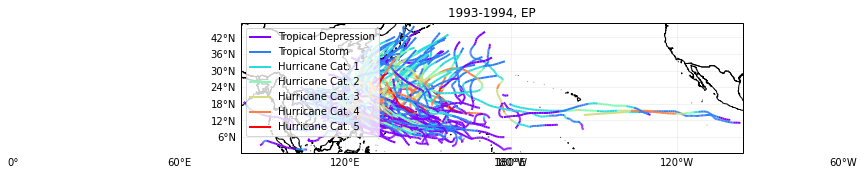

In [14]:

# other ibtracs selection options
from climada.hazard import TCTracks
sel_ibtracs = TCTracks()
# years 1993 and 1994 in basin EP.
# correct_pres ignores tracks with not enough data. For statistics (frequency of events), these should be considered as well
sel_ibtracs.read_ibtracs_netcdf(provider='usa', year_range=(1993, 2004), basin='WP', correct_pres=False)
print('Number of tracks:', sel_ibtracs.size)
ax = sel_ibtracs.plot()
ax.get_legend()._loc = 2 # correct legend location
ax.set_title('1993-1994, EP') # set title

In [17]:
track1 = TCTracks()
track1.read_ibtracs_netcdf(provider='usa', storm_id='2007314N10093') # SIDR 2007
track2 = TCTracks()
track2.read_ibtracs_netcdf(provider='usa', storm_id='2016138N10081') # ROANU 2016
track1.append(track2.data) # put both tracks together

In [23]:
track1.data

[<xarray.Dataset>
 Dimensions:                 (time: 47)
 Coordinates:
   * time                    (time) datetime64[ns] 2007-11-10T06:00:00 ... 2007-11-16
     lat                     (time) float32 9.6 9.6524935 ... 23.476011 23.766668
     lon                     (time) float32 93.200005 93.11251 ... 91.00001
 Data variables:
     time_step               (time) float64 1.08e+04 1.08e+04 ... 1.08e+04
     radius_max_wind         (time) float32 0.0 45.0 45.0 45.0 ... 30.0 22.0 15.0
     radius_oci              (time) float32 0.0 180.0 180.0 ... 202.0 138.0 75.0
     max_sustained_wind      (time) float32 15.0 17.0 20.0 ... 100.0 80.0 60.0
     central_pressure        (time) float32 1010.0 1007.0 1005.0 ... 963.0 978.0
     environmental_pressure  (time) float64 1.01e+03 1.008e+03 ... 1.004e+03
 Attributes:
     max_sustained_wind_unit:  kn
     central_pressure_unit:    mb
     name:                     SIDR
     sid:                      2007314N10093
     orig_event_flag:         

2020-11-24 16:44:27,940 - climada.util.files_handler - INFO - Downloading file IBTrACS.ALL.v04r00.nc


IBTrACS.ALL.v04r00.nc: 25.9MB [00:59, 438kB/s]                                                                         
C:\Users\ATeklesadik\OneDrive - Rode Kruis\Documents\documents\climada\climada_python-main\climada\util\plot.py:314: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  fig.tight_layout()


2020-11-24 16:45:28,163 - climada.hazard.tc_tracks - WARNING - No valid wind/pressure values found for 1993178N14265, 1993221N12216, 1993223N07185, 1993246N16129, 1993263N11168, 1993271N14134, 1993285N12192, 1993285N16239, 1994128N04155, 1994212N11240, 1994221N15215, 1994224N16240, 1994249N11200, 1994272N40159, 1994273N08176, 1994291N12170, 1994294N13203, 1994295N25188, 1994348N04175.
2020-11-24 16:45:28,390 - climada.hazard.tc_tracks - INFO - Progress: 11%
2020-11-24 16:45:28,536 - climada.hazard.tc_tracks - INFO - Progress: 23%
2020-11-24 16:45:28,654 - climada.hazard.tc_tracks - INFO - Progress: 35%
2020-11-24 16:45:28,803 - climada.hazard.tc_tracks - INFO - Progress: 47%
2020-11-24 16:45:28,945 - climada.hazard.tc_tracks - INFO - Progress: 58%
2020-11-24 16:45:29,091 - climada.hazard.tc_tracks - INFO - Progress: 70%
2020-11-24 16:45:29,258 - climada.hazard.tc_tracks - INFO - Progress: 82%
2020-11-24 16:45:29,362 - climada.hazard.tc_tracks - INFO - Progress: 94%
Number of tracks: 34

C:\Users\ATeklesadik\OneDrive - Rode Kruis\Documents\documents\climada\climada_python-main\climada\util\plot.py:314: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  fig.tight_layout()
C:\Users\ATeklesadik\OneDrive - Rode Kruis\Documents\documents\climada\climada_python-main\climada\util\plot.py:314: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  fig.tight_layout()
c:\users\ateklesadik\anaconda3\envs\climada_env\lib\site-packages\cartopy\mpl\feature_artist.py:225: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  **dict(style))


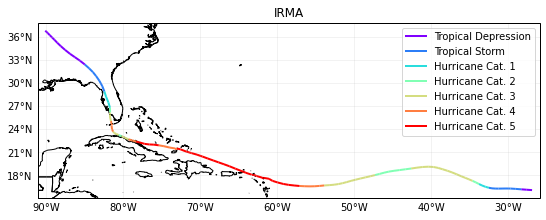

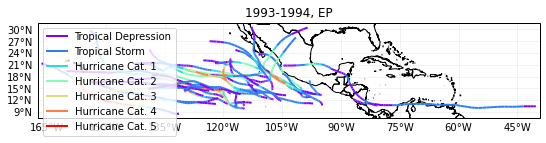

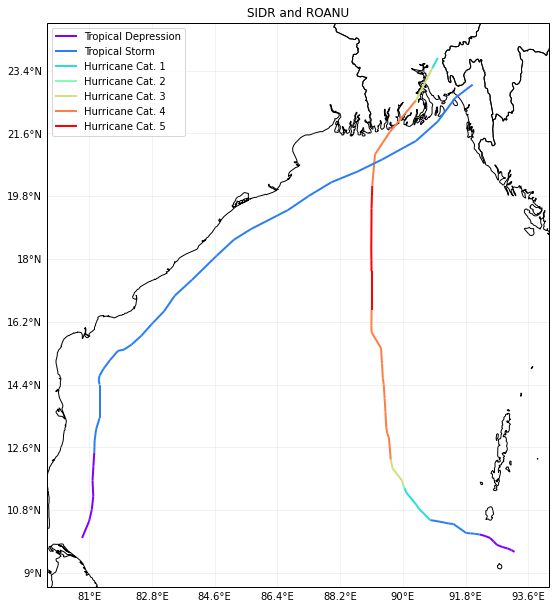

In [6]:







ax = track1.plot()
ax.get_legend()._loc = 2 # correct legend location
ax.set_title('SIDR and ROANU'); # set title

In [36]:
tr_irma = TCTracks()
tr_irma.read_ibtracs_netcdf(provider='usa', storm_id='2017242N16333') # IRMA 2017
 

tr_irma.calc_random_walk(ens_size=5)
 

2020-11-24 17:21:32,062 - climada.hazard.tc_tracks_synth - INFO - Computing 5 synthetic tracks.


In [38]:
tr_irma.data 

[<xarray.Dataset>
 Dimensions:                 (time: 123)
 Coordinates:
   * time                    (time) datetime64[ns] 2017-08-30 ... 2017-09-13T12:00:00
     lat                     (time) float32 16.1 16.147842 ... 36.495224 36.8
     lon                     (time) float32 -26.9 -27.592503 ... -90.100006
 Data variables:
     time_step               (time) float64 1.08e+04 1.08e+04 ... 1.08e+04
     radius_max_wind         (time) float32 60.0 60.0 60.0 ... 60.0 60.0 60.0
     radius_oci              (time) float32 180.0 180.0 180.0 ... 350.0 350.0
     max_sustained_wind      (time) float32 30.0 32.0 35.0 ... 15.0 15.0 15.0
     central_pressure        (time) float32 1008.0 1007.0 ... 1004.0 1005.0
     environmental_pressure  (time) float64 1.012e+03 1.012e+03 ... 1.008e+03
     on_land                 (time) bool False False False ... True True True
     dist_since_lf           (time) float64 nan nan nan ... 1.429e+03 1.473e+03
 Attributes:
     max_sustained_wind_unit:  kn
  

In [41]:
tc_syn = tr_irma.get_track('2017242N16333_gen1')
import numpy as np
# 1. Which is the time frequency of the data?
# The values of a DataArray are numpy.arrays.
# The nummpy.ediff1d computes the different between elements in an array
diff_time_ns = np.ediff1d(tc_syn.time)
diff_time_h = diff_time_ns.astype(int)/1000/1000/1000/60/60
print('Mean time frequency in hours:', diff_time_h.mean())
print('Std time frequency in hours:', diff_time_h.std())
print()

# 2. Compute the maximum sustained wind for each day.
print('Daily max sustained wind:', tc_syn.max_sustained_wind.groupby('time.day').max())

Mean time frequency in hours: -0.00044758439402550103
Std time frequency in hours: 0.0002188257578339769

Daily max sustained wind: <xarray.DataArray 'max_sustained_wind' (day: 15)>
array([100.        , 100.        , 100.        , 120.        ,
       155.        , 155.        , 150.        , 142.        ,
       145.        , 130.29148865, 113.85282135,  92.89006042,
        76.9491272 ,  52.        ,  97.        ])
Coordinates:
  * day      (day) int64 1 2 3 4 5 6 7 8 9 10 11 12 13 30 31


In [44]:
 diff_time_ns.astype(int)

array([-1842749440, -1842749440, -1842749440, -1842749440, -1842749440,
       -1842749440, -1842749440, -1842749440, -1842749440, -1842749440,
       -1842749440, -1842749440, -1842749440, -1842749440, -1842749440,
       -1842749440, -1842749440, -1842749440, -1842749440, -1842749440,
       -1842749440, -1842749440, -1842749440, -1842749440, -1842749440,
       -1842749440, -1842749440, -1842749440, -1842749440, -1842749440,
       -1842749440, -1842749440, -1842749440, -1842749440, -1842749440,
       -1842749440, -1842749440, -1842749440, -1842749440, -1842749440,
       -1842749440, -1842749440, -1842749440, -1842749440, -1842749440,
       -1842749440, -1842749440, -1842749440, -1842749440, -1842749440,
       -1842749440, -1842749440, -1842749440, -1842749440, -1842749440,
       -1842749440, -1842749440,   100382720, -1943132160, -1842749440,
        -308320256, -1534429184, -1842749440,  1226108928,  1226108928,
       -1842749440, -1842749440, -1842749440, -1842749440, -1842

In [43]:
diff_time_h

array([-5.11874844e-04, -5.11874844e-04, -5.11874844e-04, -5.11874844e-04,
       -5.11874844e-04, -5.11874844e-04, -5.11874844e-04, -5.11874844e-04,
       -5.11874844e-04, -5.11874844e-04, -5.11874844e-04, -5.11874844e-04,
       -5.11874844e-04, -5.11874844e-04, -5.11874844e-04, -5.11874844e-04,
       -5.11874844e-04, -5.11874844e-04, -5.11874844e-04, -5.11874844e-04,
       -5.11874844e-04, -5.11874844e-04, -5.11874844e-04, -5.11874844e-04,
       -5.11874844e-04, -5.11874844e-04, -5.11874844e-04, -5.11874844e-04,
       -5.11874844e-04, -5.11874844e-04, -5.11874844e-04, -5.11874844e-04,
       -5.11874844e-04, -5.11874844e-04, -5.11874844e-04, -5.11874844e-04,
       -5.11874844e-04, -5.11874844e-04, -5.11874844e-04, -5.11874844e-04,
       -5.11874844e-04, -5.11874844e-04, -5.11874844e-04, -5.11874844e-04,
       -5.11874844e-04, -5.11874844e-04, -5.11874844e-04, -5.11874844e-04,
       -5.11874844e-04, -5.11874844e-04, -5.11874844e-04, -5.11874844e-04,
       -5.11874844e-04, -

In [ ]:
from climada.hazard import Centroids, TropCyclone

# construct centroids
min_lat, max_lat, min_lon, max_lon = 16.99375, 21.95625, -72.48125, -61.66875
cent = Centroids()
cent.set_raster_from_pnt_bounds((min_lon, min_lat, max_lon, max_lat), res=0.12)
cent.check()
cent.plot()

# construct tropical cyclones
tc_irma = TropCyclone()
tc_irma.set_from_tracks(tr_irma, centroids=cent)
#tc_irma.set_from_tracks(tr_irma) # try without given centroids
tc_irma.check()
tc_irma.plot_intensity('2017242N16333')      # IRMA
tc_irma.plot_intensity('2017242N16333_gen2') # IRMA's synthetic track 2